In [50]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import openpyxl
import csv

In [56]:
csv_file_path = "/home/rest/forpyzx/kekka1225/1225aa.csv"
df = pd.read_csv(csv_file_path)

print(df)

                    optimize_name  qubit  input_gates  p_t  seeds  H_edge  \
0    clifford_simp_not_post_basic      4          100  0.0      1      22   
1    clifford_simp_not_post_basic      4          100  0.0      2      18   
2    clifford_simp_not_post_basic      4          100  0.0      3      20   
3    clifford_simp_not_post_basic      4          100  0.0      4      20   
4    clifford_simp_not_post_basic      4          100  0.0      5      22   
..                            ...    ...          ...  ...    ...     ...   
985  clifford_simp_not_post_basic     16        10000  0.4      1    9324   
986  clifford_simp_not_post_basic     16        10000  0.4      2   11145   
987  clifford_simp_not_post_basic     16        10000  0.4      3    9212   
988  clifford_simp_not_post_basic     16        10000  0.4      4   10471   
989  clifford_simp_not_post_basic     16        10000  0.4      5   10981   

     H + 2 qubit gates     H  2 qubit gates  gates_aft  
0                 

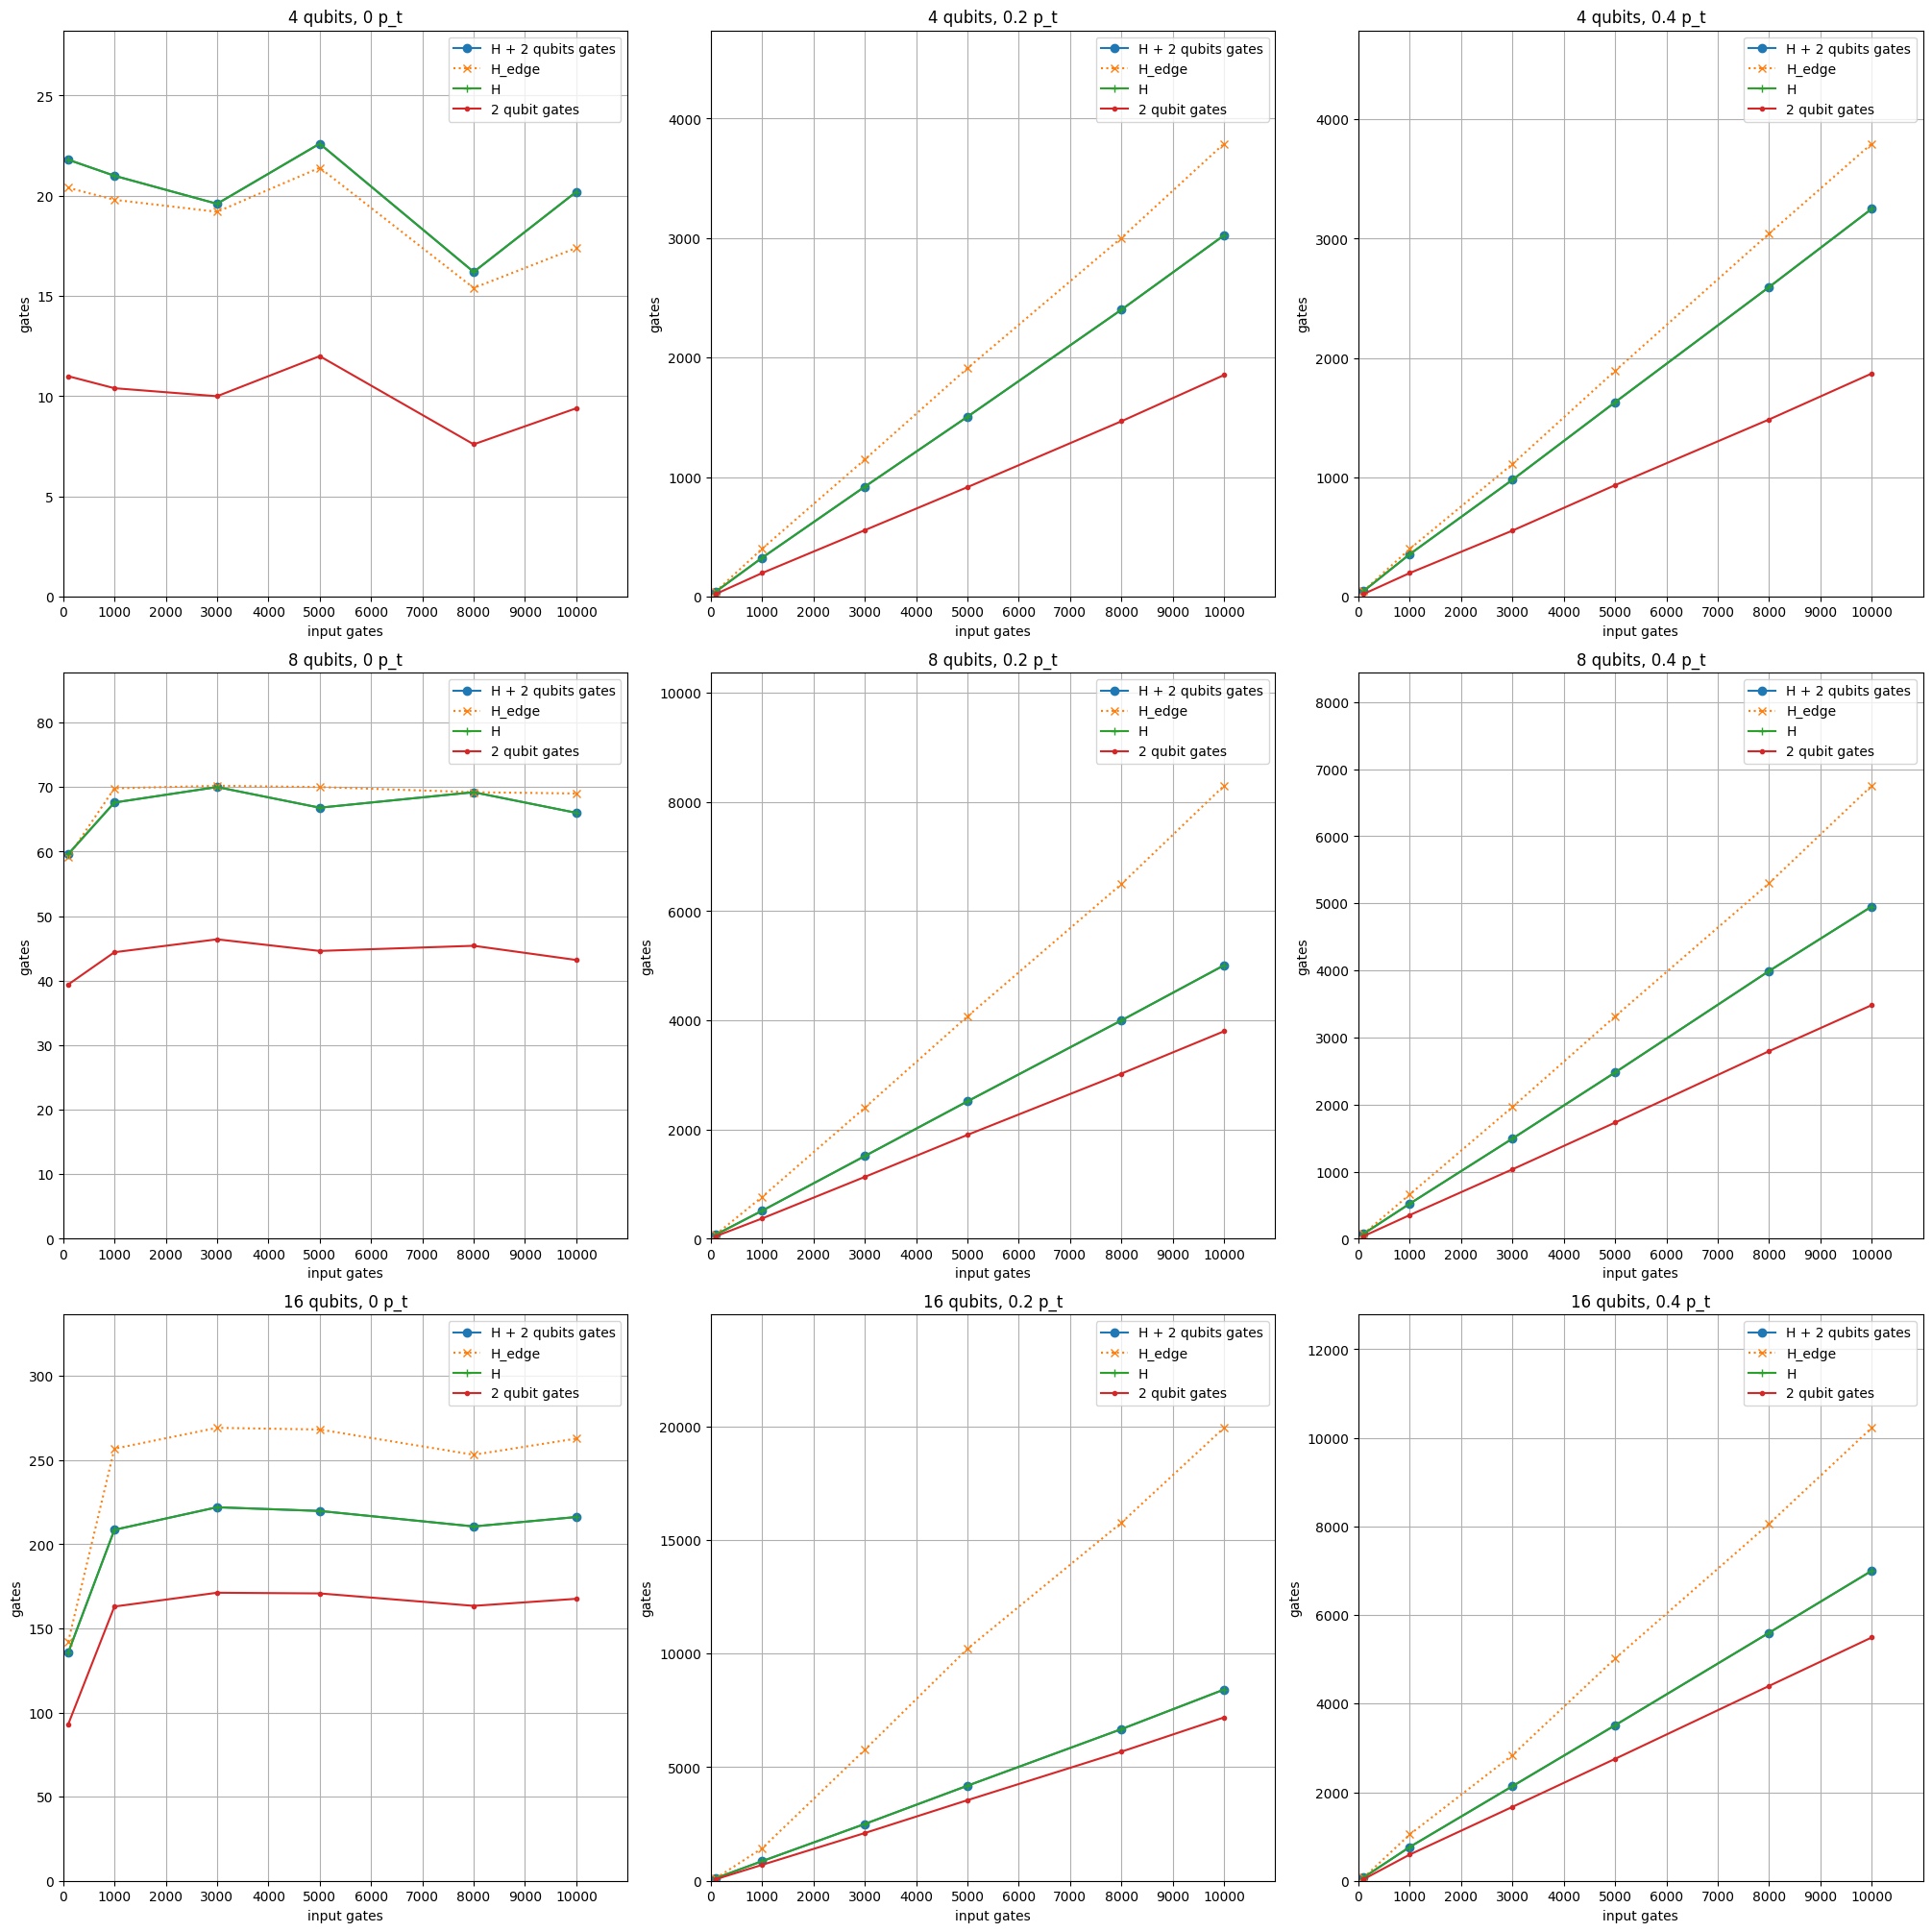

In [ ]:

qubits = [4,8,16]
gates = [100,1000,3000,5000,8000,10000]
p_t_lists = [0,0.20,0.40]

#fig,axes = plt.subplots(7,11)

fig, ax = plt.subplots(len(qubits),len(p_t_lists),figsize=(20, 20),constrained_layout=True)
for qubit in range(len(qubits)):
    for p_t in range(len(p_t_lists)):
        #print(qubit,p_t)
        ax[qubit][p_t].set_title(f"{qubits[qubit]} qubits, {p_t_lists[p_t]} p_t")
        ax[qubit][p_t].set_xlabel("input gates")
        ax[qubit][p_t].set_ylabel("gates")
        ax[qubit][p_t].set_xlim(0, 11000)
        ax[qubit][p_t].set_xticks(np.arange(0, 10001, 1000))

        ax[qubit][p_t].grid(True)

        tate =[]
        tate2 =[]
        tate3 =[]
        tate4 =[]
        for gate in gates:
            mean_data = df[(df["input_gates"] == gate) & (df["qubit"] == qubits[qubit]) & (df["p_t"] == p_t_lists[p_t])]
            mean2 = mean_data["H_edge"].mean()
            tate2.append(mean2)

            mean = mean_data["H + 2 qubit gates"].mean()
            tate.append(mean)

            mean = mean_data['H'].mean()
            tate3.append(mean)

            mean4 = mean_data["2 qubit gates"].mean()
            tate4.append(mean4)


        ax[qubit][p_t].set_ylim(0,max(sorted(tate)[-1]*1.25,sorted(tate2)[-1]*1.25))

        ax[qubit][p_t].plot(gates,tate,'o',label="H + 2 qubits gates",linestyle="-")
        ax[qubit][p_t].plot(gates,tate2,'x',label="H_edge",linestyle=":")
        ax[qubit][p_t].plot(gates,tate3,'+',label="H",linestyle="-")
        ax[qubit][p_t].plot(gates,tate4,'.',label="2 qubit gates",linestyle="-")
        ax[qubit][p_t].legend()

plt.show()



   p_t   2qubit_gate
5  0.2  13296.333333 original 4
   p_t  2qubit_gate
5  0.2       9049.0 basic 4
   p_t  2qubit_gate
5  0.2  8042.333333 clifford_simp 4
   p_t   2qubit_gate
5  0.2  13210.666667 original 16
   p_t  2qubit_gate
5  0.2      12383.0 basic 16
   p_t   2qubit_gate
5  0.2  33850.666667 clifford_simp 16


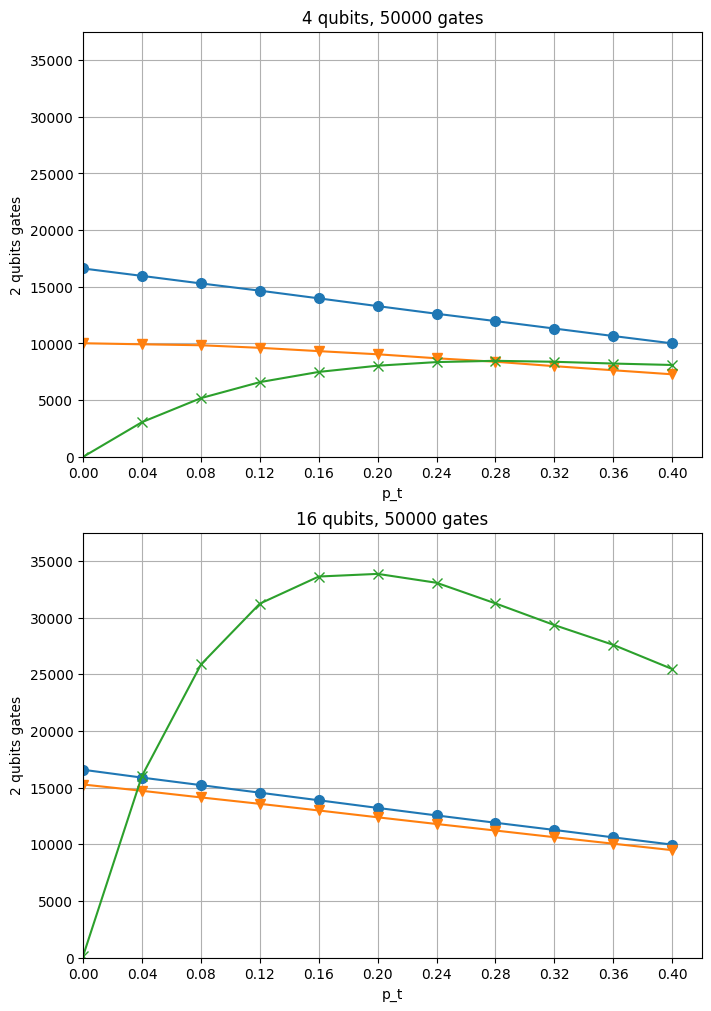

In [70]:
qubits = [4,16]
gates = 50000
p_t_lists = [i * 0.04 for i in range(0, 11)]
optimize_name = ["original","basic","clifford_simp"]

#fig,axes = plt.subplots(7,11)
fig, ax = plt.subplots(len(qubits),figsize=(7, 10),constrained_layout=True)

#p_tを変化させた時のゲート数
for qubit in range(len(qubits)):
        ax[qubit].set_title(f"{qubits[qubit]} qubits, {gates} gates")
        ax[qubit].set_xlabel("p_t")
        ax[qubit].set_ylabel("2 qubits gates")
        ax[qubit].set_xlim(min(p_t_lists),max(p_t_lists)+0.02)
        ax[qubit].set_xticks(p_t_lists)
        ax[qubit].set_ylim(0,gates*0.75)
        ax[qubit].grid(True)

        for optimize in optimize_name:
            data = df[(df["optimize_name"] == optimize) & (df["gates_bef"] == gates) & (df["qubits"] == qubits[qubit]) ]
            if optimize == "clifford_simp" :
                plot_style = 'x'
            elif optimize == "basic":
                plot_style = 'v'
            else: 
                plot_style = 'o'

            mean_data = (data.groupby("p_t", as_index=False)["2qubit_gate"].mean())
            #print(mean_data)
            print(mean_data[mean_data["p_t"] == 0.20] , optimize ,qubits[qubit])

            ax[qubit].plot(mean_data["p_t"],mean_data["2qubit_gate"],plot_style,linestyle='-',markersize=7,label=optimize)
            #ax[qubit].legend()

plt.show()

   p_t   1qubit_gate
5  0.2  36703.666667 original 4
   p_t  1qubit_gate
5  0.2      14415.0 basic 4
   p_t  1qubit_gate
5  0.2       9699.0 clifford_simp 4
   p_t   1qubit_gate
5  0.2  36789.333333 original 16
   p_t   1qubit_gate
5  0.2  15292.666667 basic 16
   p_t   1qubit_gate
5  0.2  11378.666667 clifford_simp 16


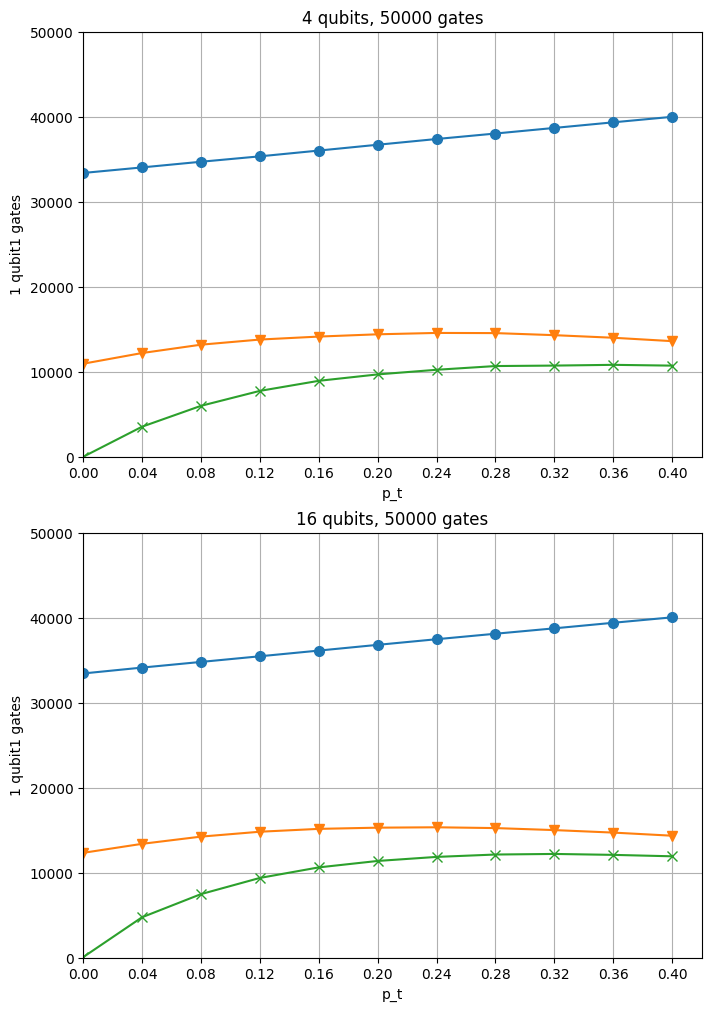

In [69]:
qubits = [4,16]
gates = 50000
p_t_lists = [i * 0.04 for i in range(0, 11)]
optimize_name = ["original","basic","clifford_simp"]

#fig,axes = plt.subplots(7,11)
fig, ax = plt.subplots(len(qubits),figsize=(7, 10),constrained_layout=True)

#p_tを変化させた時のゲート数
for qubit in range(len(qubits)):
        ax[qubit].set_title(f"{qubits[qubit]} qubits, {gates} gates")
        ax[qubit].set_xlabel("p_t")
        ax[qubit].set_ylabel("1 qubit1 gates")
        ax[qubit].set_xlim(min(p_t_lists),max(p_t_lists)+0.02)
        ax[qubit].set_xticks(p_t_lists)
        ax[qubit].set_ylim(0,gates)
        ax[qubit].grid(True)

        for optimize in optimize_name:
            data = df[(df["optimize_name"] == optimize) & (df["gates_bef"] == gates) & (df["qubits"] == qubits[qubit]) ]
            if optimize == "clifford_simp" :
                plot_style = 'x'
            elif optimize == "basic":
                plot_style = 'v'
            else: 
                plot_style = 'o'

            mean_data = (data.groupby("p_t", as_index=False)["1qubit_gate"].mean())
            print(mean_data[mean_data["p_t"] == 0.20] , optimize ,qubits[qubit])
            #print(mean_data)

            ax[qubit].plot(mean_data["p_t"],mean_data["1qubit_gate"],plot_style,linestyle='-',markersize=7,label=optimize)
            #ax[qubit].legend()

plt.show()

In [37]:
handles.append(line)
labels.append(optimize)
# 凡例のみの図を作成
legend_fig = plt.figure(figsize=(5, 2))  # 凡例のサイズ調整
legend_fig.legend(handles, labels, loc="center", ncol=len(optimize_name), frameon=False)
plt.axis("off")  # 軸を消す
plt.tight_layout()

# 凡例を保存する（必要に応じてファイル名を変更）
legend_fig.savefig("legend_only.png", dpi=300)

plt.show()

NameError: name 'handles' is not defined

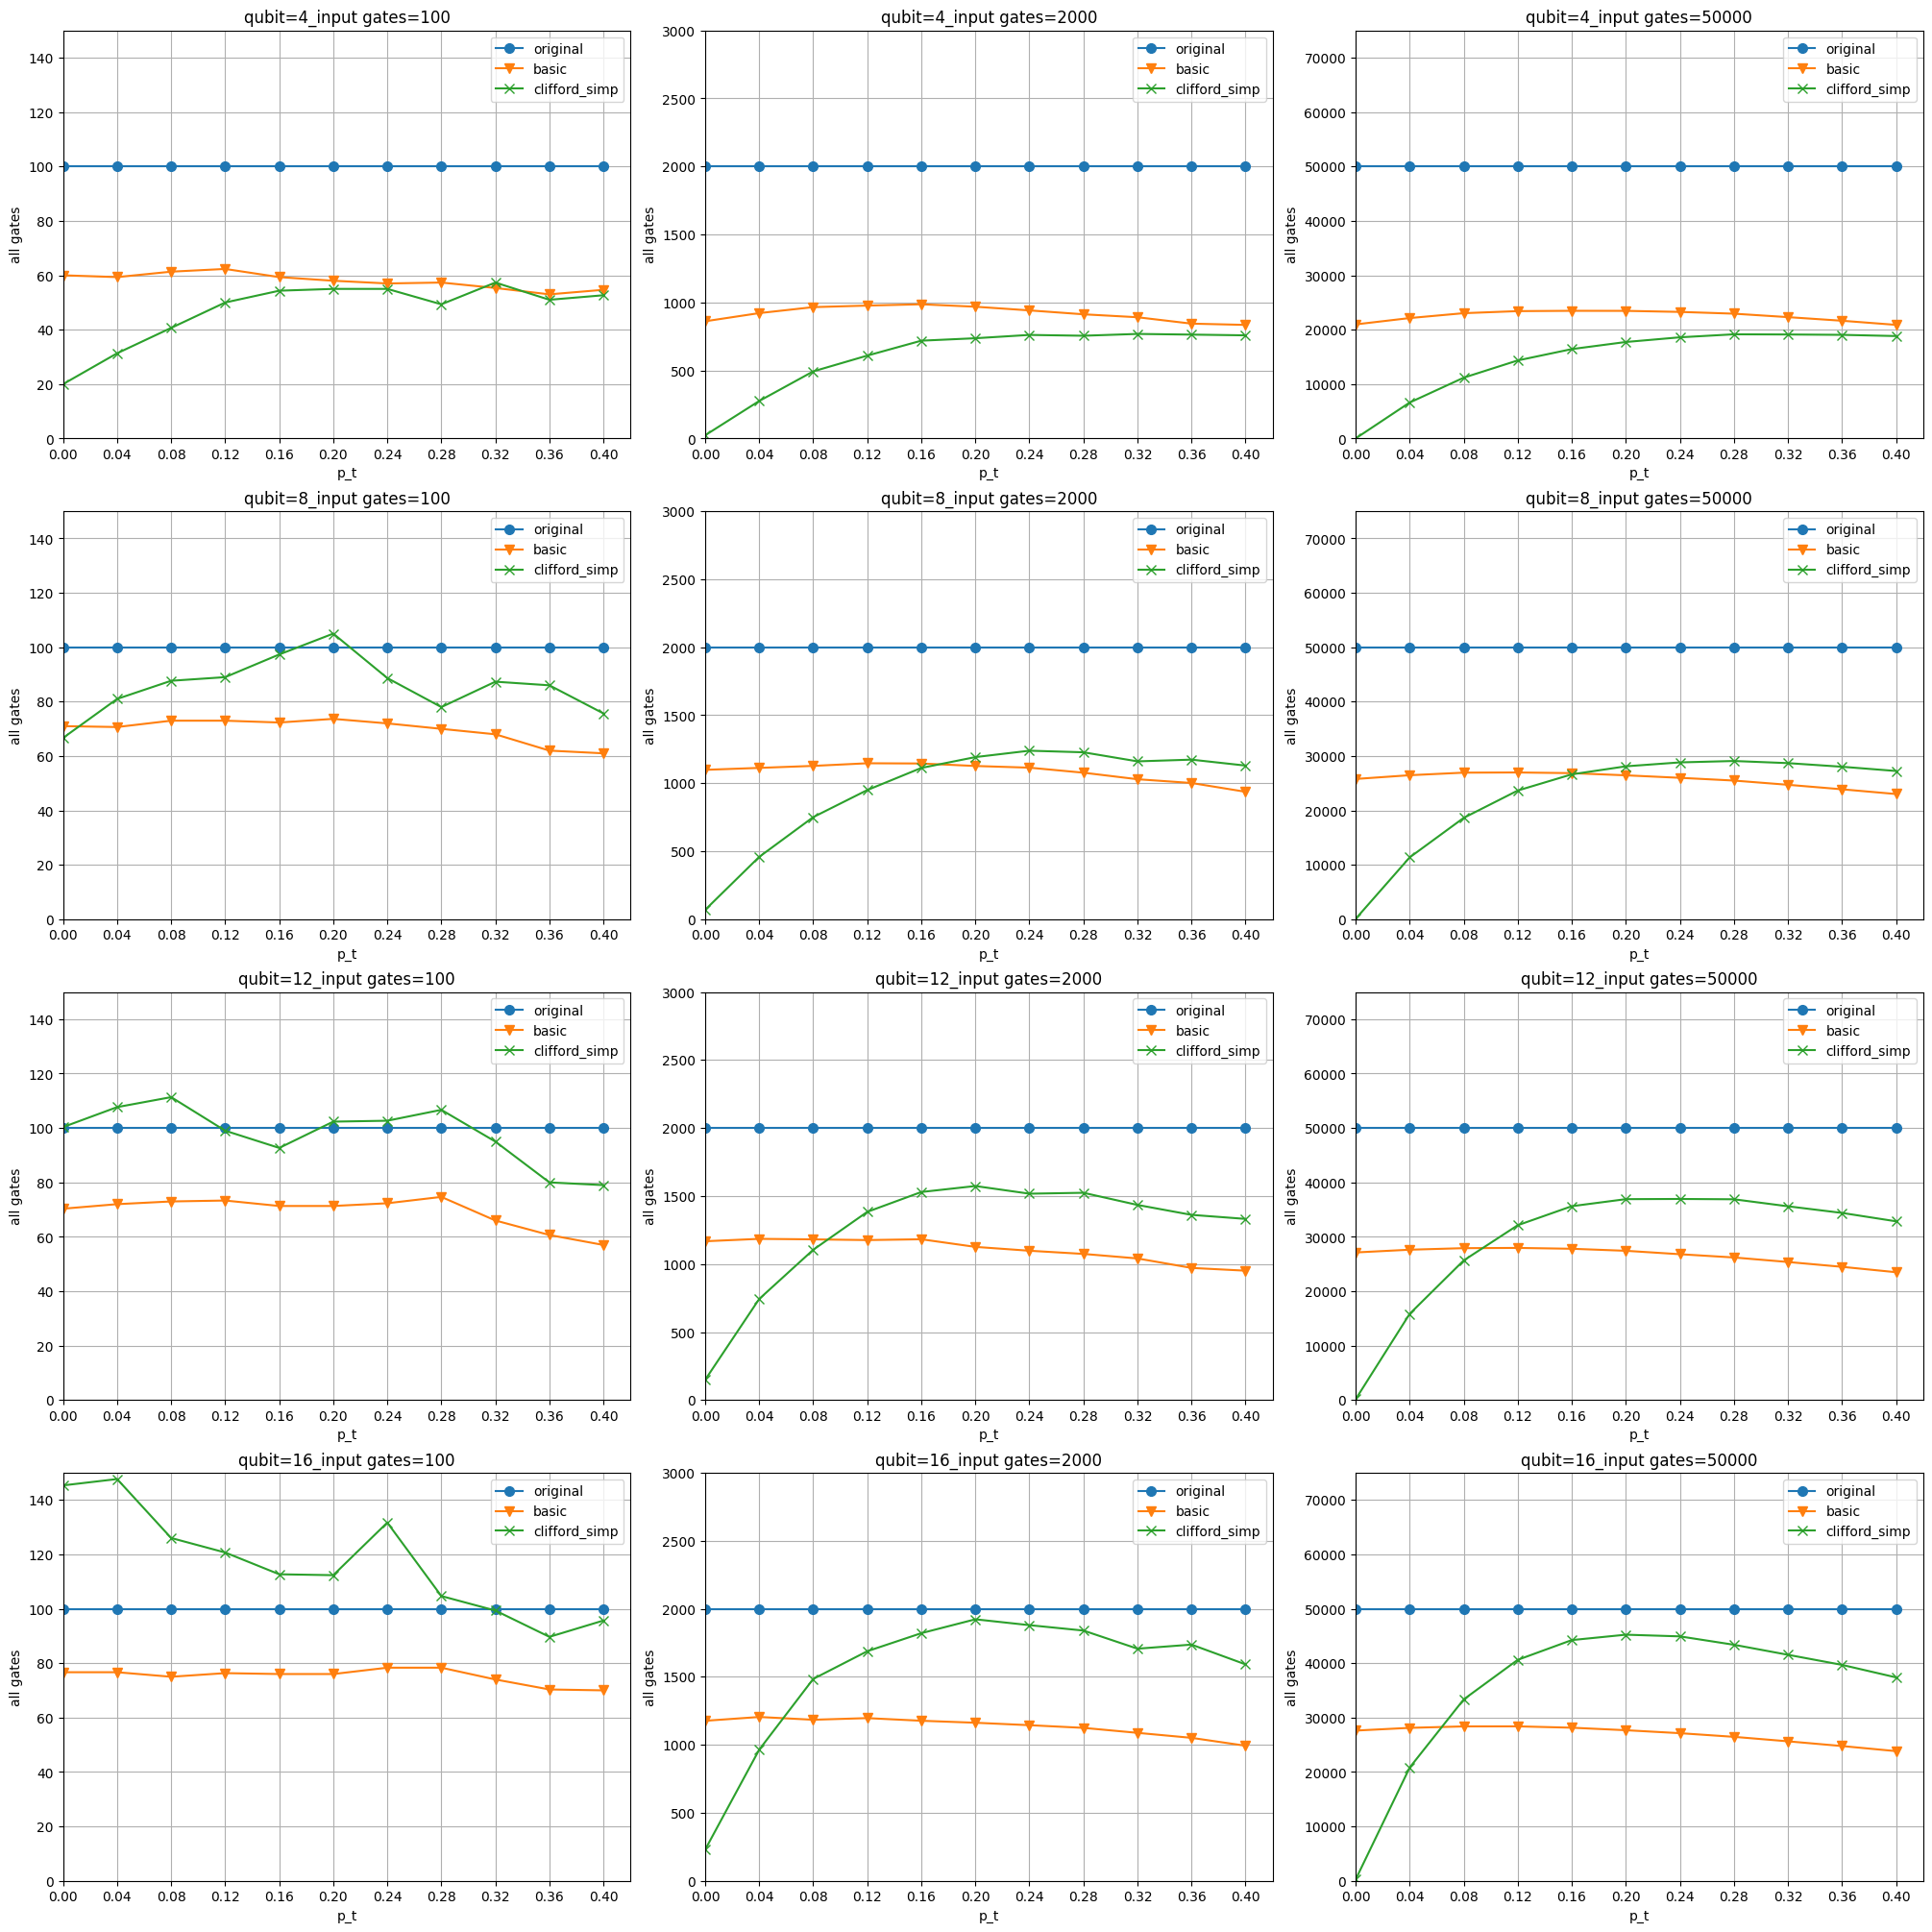

In [ ]:
#1218 ミーティングよう
qubits = [4,8,12,16]
gates = [100,2000,50000]
p_t_lists = [i * 0.04 for i in range(0, 11)]
optimize_name = ["original","basic","clifford_simp"]

#fig,axes = plt.subplots(7,11)
fig, ax = plt.subplots(len(qubits), len(gates),figsize=(20, 20),constrained_layout=True)

#p_tを変化させた時のゲート数
for qubit in range(len(qubits)):
    for gate in range(len(gates)):
        ax[qubit][gate].set_title(f"qubit={qubits[qubit]}_input gates={gates[gate]}")
        ax[qubit][gate].set_xlabel("p_t")
        ax[qubit][gate].set_ylabel("all gates")
        ax[qubit][gate].set_xlim(min(p_t_lists),max(p_t_lists)+0.02)
        ax[qubit][gate].set_xticks(p_t_lists)
        ax[qubit][gate].set_ylim(0,gates[gate]*1.5)
        ax[qubit][gate].grid(True)

        for optimize in optimize_name:
            data = df[(df["optimize_name"] == optimize) & (df["gates_bef"] == gates[gate]) & (df["qubits"] == qubits[qubit]) ]
            if optimize == "clifford_simp" :
                plot_style = 'x'
            elif optimize == "basic":
                plot_style = 'v'
            else: 
                plot_style = 'o'

            mean_data = (data.groupby("p_t", as_index=False)["gates_aft"].mean())
            #print(mean_data[mean_data["p_t"] == 0.20] , optimize ,qubits[qubit])
            #print(mean_data)

            ax[qubit][gate].plot(mean_data["p_t"],mean_data["gates_aft"],plot_style,linestyle='-',markersize=7,label=optimize)
            ax[qubit][gate].legend()
plt.show()

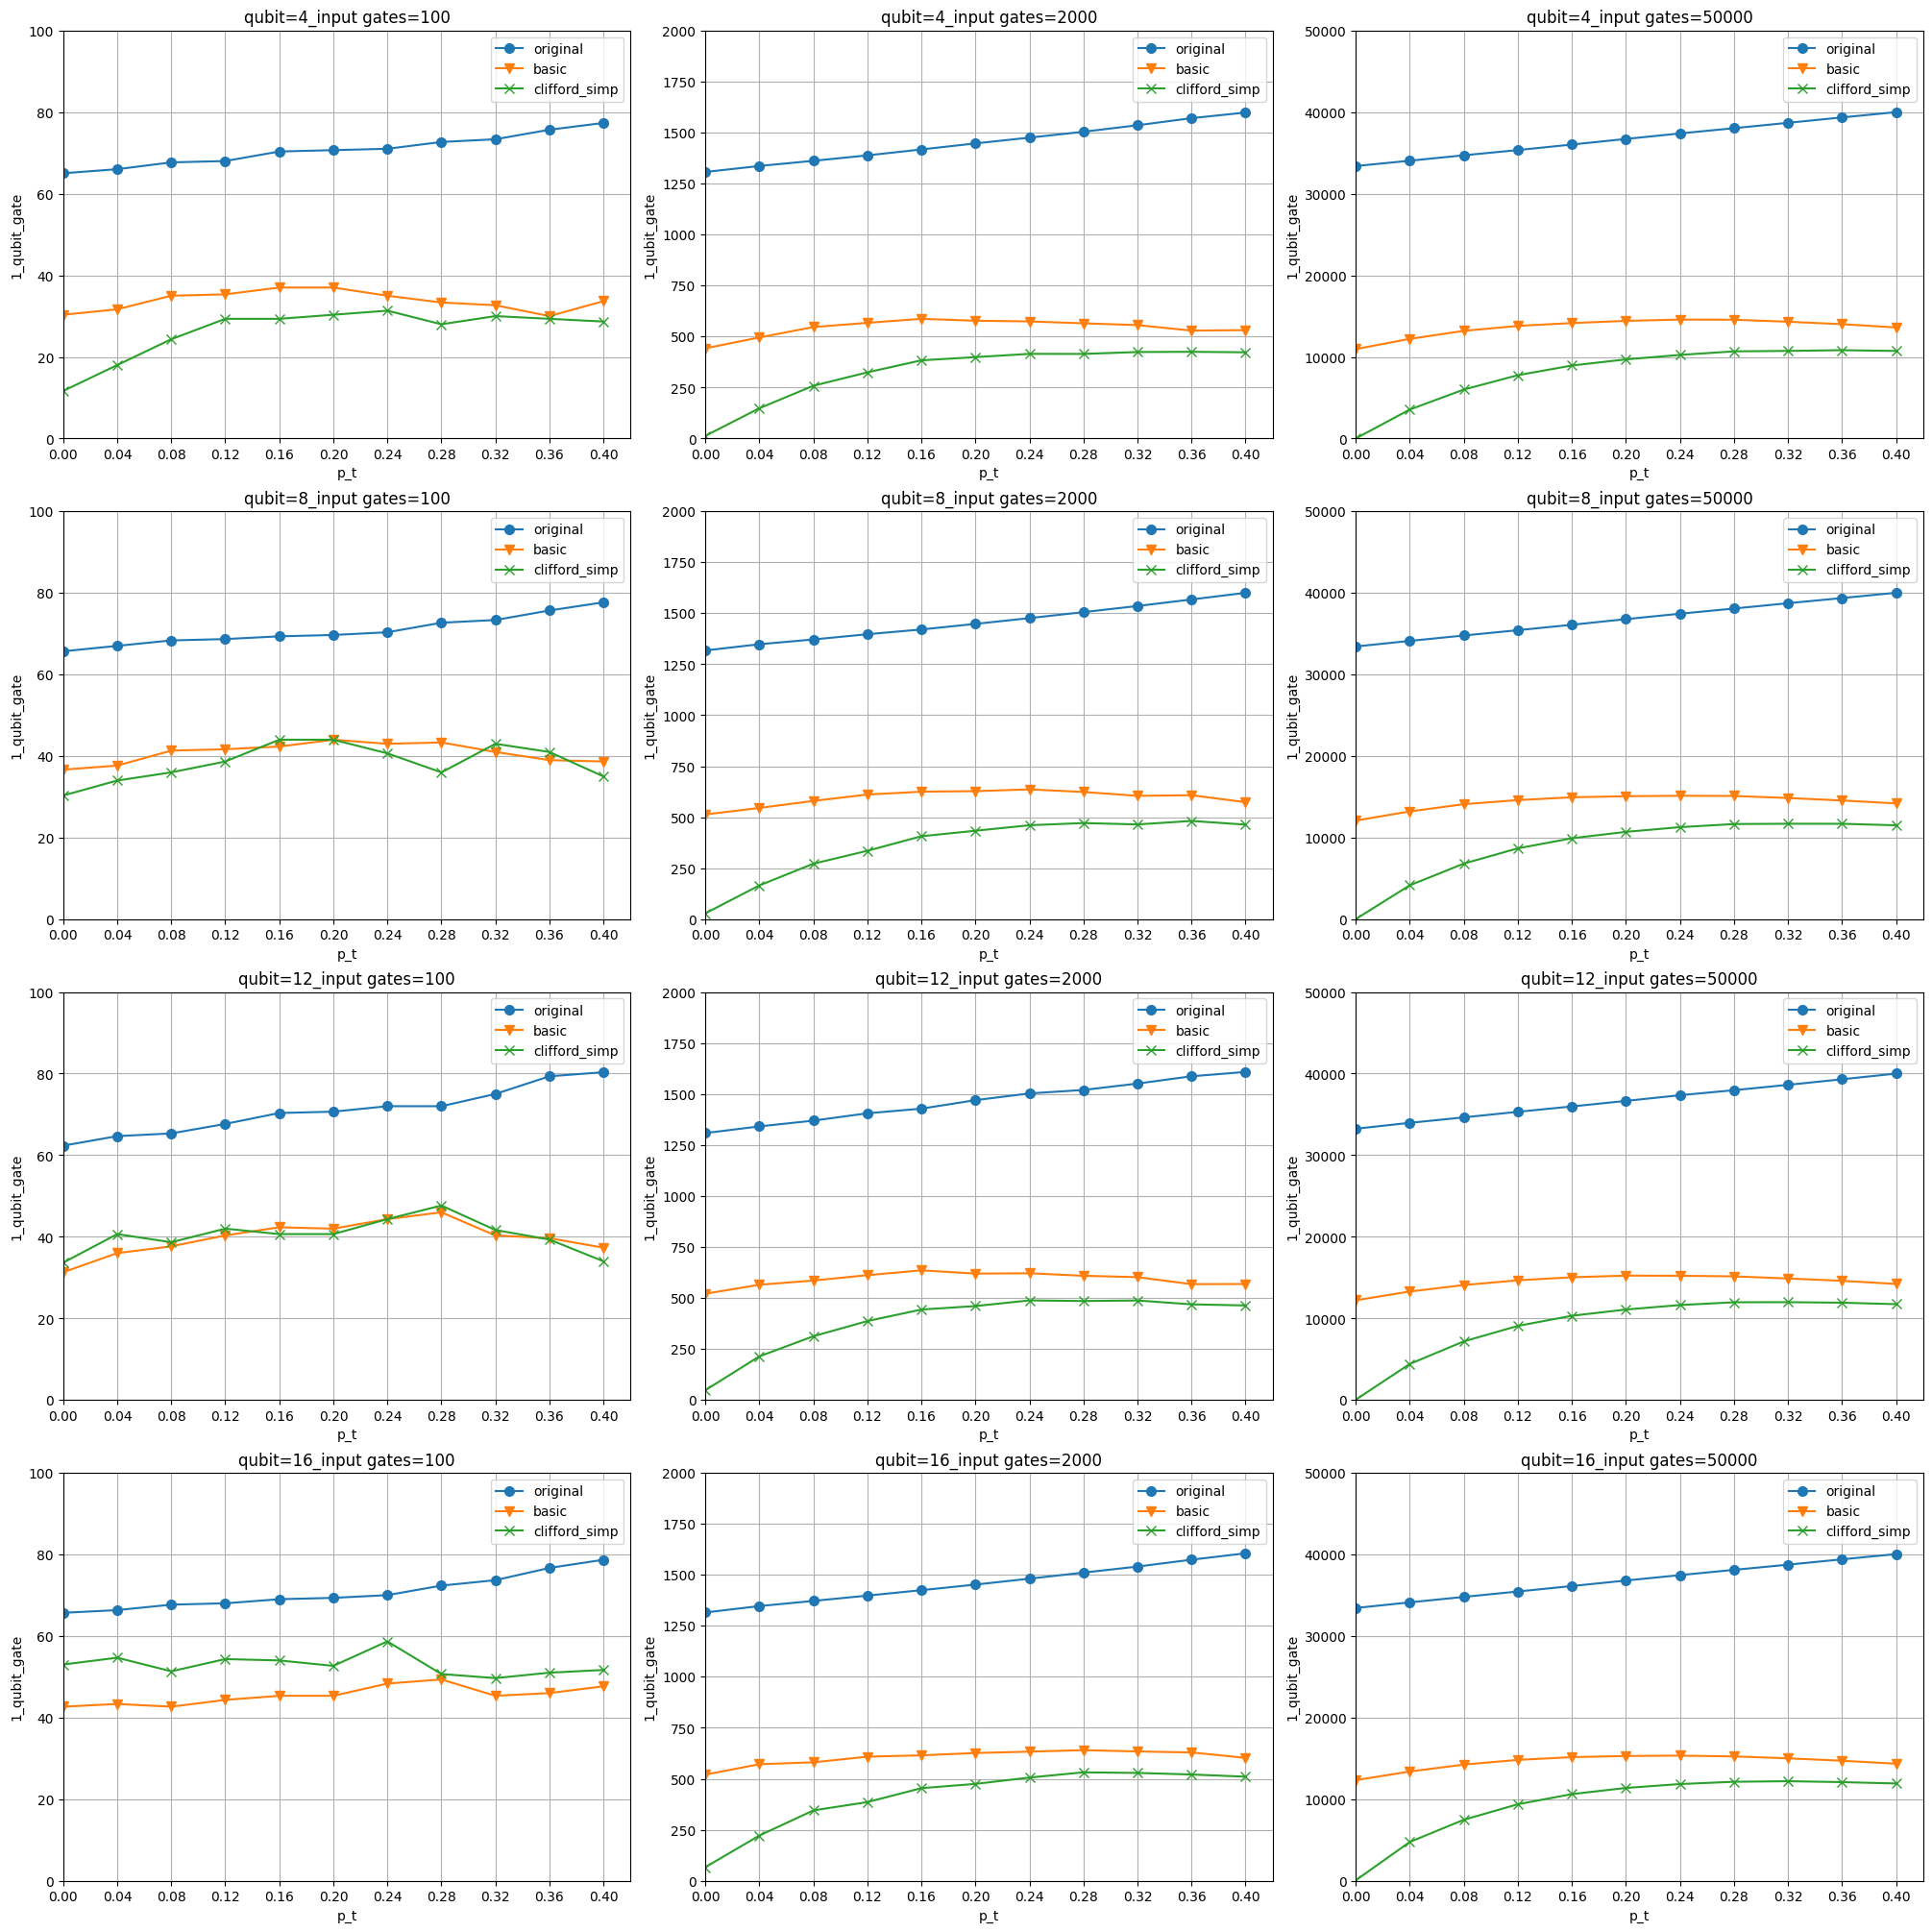

In [19]:
#1218 ミーティングよう
qubits = [4,8,12,16]
gates = [100,2000,50000]
p_t_lists = [i * 0.04 for i in range(0, 11)]
optimize_name = ["original","basic","clifford_simp"]

#fig,axes = plt.subplots(7,11)
fig, ax = plt.subplots(len(qubits), len(gates),figsize=(20, 20),constrained_layout=True)

#p_tを変化させた時のゲート数
for qubit in range(len(qubits)):
    for gate in range(len(gates)):
        ax[qubit][gate].set_title(f"qubit={qubits[qubit]}_input gates={gates[gate]}")
        ax[qubit][gate].set_xlabel("p_t")
        ax[qubit][gate].set_ylabel("1_qubit_gate")
        ax[qubit][gate].set_xlim(min(p_t_lists),max(p_t_lists)+0.02)
        ax[qubit][gate].set_xticks(p_t_lists)
        ax[qubit][gate].set_ylim(0,gates[gate]*1.0)
        ax[qubit][gate].grid(True)

        for optimize in optimize_name:
            data = df[(df["optimize_name"] == optimize) & (df["gates_bef"] == gates[gate]) & (df["qubits"] == qubits[qubit]) ]
            if optimize == "clifford_simp" :
                plot_style = 'x'
            elif optimize == "basic":
                plot_style = 'v'
            else: 
                plot_style = 'o'

            mean_data = (data.groupby("p_t", as_index=False)["1qubit_gate"].mean())
            #print(mean_data[mean_data["p_t"] == 0.20] , optimize ,qubits[qubit])
            #print(mean_data)

            ax[qubit][gate].plot(mean_data["p_t"],mean_data["1qubit_gate"],plot_style,linestyle='-',markersize=7,label=optimize)
            ax[qubit][gate].legend()
plt.show()

In [ ]:
#1218 ミーティングよう
qubits = [4,8,12,16]
gates = [100,2000,50000]
p_t_lists = [i * 0.04 for i in range(0, 11)]
optimize_name = ["original","basic","clifford_simp"]

#fig,axes = plt.subplots(7,11)
fig, ax = plt.subplots(len(qubits), len(gates),figsize=(20, 20),constrained_layout=True)

#p_tを変化させた時のゲート数
for qubit in range(len(qubits)):
    for gate in range(len(gates)):
        ax[qubit][gate].set_title(f"qubit={qubits[qubit]}_input gates={gates[gate]}")
        ax[qubit][gate].set_xlabel("p_t")
        ax[qubit][gate].set_ylabel("2 qubits gates")
        ax[qubit][gate].set_xlim(min(p_t_lists),max(p_t_lists)+0.02)
        ax[qubit][gate].set_xticks(p_t_lists)
        ax[qubit][gate].set_ylim(0,gates[gate]*1.0)
        ax[qubit][gate].grid(True)

        for optimize in optimize_name:
            data = df[(df["optimize_name"] == optimize) & (df["gates_bef"] == gates[gate]) & (df["qubits"] == qubits[qubit]) ]
            if optimize == "clifford_simp" :
                plot_style = 'x'
            elif optimize == "basic":
                plot_style = 'v'
            else: 
                plot_style = 'o'

            mean_data = (data.groupby("p_t", as_index=False)["2qubit_gate"].mean())
            #print(mean_data[mean_data["p_t"] == 0.20] , optimize ,qubits[qubit])
            #print(mean_data)

            ax[qubit][gate].plot(mean_data["p_t"],mean_data["2qubit_gate"],plot_style,linestyle='-',markersize=7,label=optimize)
            ax[qubit][gate].legend()
plt.show()